In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-32-powerlifters/openpowerlifting.csv


In [2]:
import pandas as pd

# Load the dataset from a CSV file
data = pd.read_csv('/kaggle/input/top-32-powerlifters/openpowerlifting.csv')

# Display the first few rows of the dataframe to verify it's loaded correctly
print(data.head())


   Rank Location Gender  Age  Equip  Class  Weight  squat  bench  deadlift  \
0    32   USA-VA      M   35    Raw   82.5    82.5  353.0  230.0     332.5   
1    27   USA-VA      M   24  Wraps  140.0   131.0  460.0  247.5     410.0   
2    28   USA-NY      F   37  Wraps   60.0    57.1  195.9  108.8     240.4   
3    30   USA-NJ      M   38    Raw   67.5    63.6  276.6  163.2     331.1   
4    25   USA-OH      F   29  Wraps   90.0    89.0  290.3  136.0     272.1   

    Total    Dots              Name  
0   915.5  620.15    Jawon Garrison  
1  1117.5  624.30      Andrew Hause  
2   545.2  623.58       Jen Hazzard  
3   771.1  620.75  Raymond Phillips  
4   698.5  625.57      Crystal Tate  


In [3]:
# Display data types to see which columns are numeric and which are categorical
print(data.dtypes)


Rank          int64
Location     object
Gender       object
Age           int64
Equip        object
Class       float64
Weight      float64
squat       float64
bench       float64
deadlift    float64
Total       float64
Dots        float64
Name         object
dtype: object


In [4]:
# Fill missing values for numeric columns with their mean and categorical with the mode
numeric_cols = data.select_dtypes(include=['float64', 'int64'])  # Adjust types as necessary
categorical_cols = data.select_dtypes(include=['object'])

data[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())
data[categorical_cols.columns] = categorical_cols.fillna(categorical_cols.mode().iloc[0])


In [5]:
# checking and converting one numeric column that may have been read as 'object'
if 'BestSquatKg' in data.columns and data['BestSquatKg'].dtype == 'object':
    # Convert to string, remove any non-numeric characters (if necessary), and convert to float
    data['BestSquatKg'] = pd.to_numeric(data['BestSquatKg'].str.replace('[^0-9.-]', ''), errors='coerce')
    
# Similarly for other expected numeric columns
if 'BestBenchKg' in data.columns and data['BestBenchKg'].dtype == 'object':
    data['BestBenchKg'] = pd.to_numeric(data['BestBenchKg'].str.replace('[^0-9.-]', ''), errors='coerce')


In [6]:
# Separate the handling of numeric and categorical data
for column in data.columns:
    if data[column].dtype == 'object':  # Assuming 'object' dtype for categorical data
        # Fill missing values with the mode
        mode_value = data[column].mode()[0]
        data[column].fillna(mode_value, inplace=True)
    else:
        # Fill missing values with the mean for numeric columns
        mean_value = data[column].mean()
        data[column].fillna(mean_value, inplace=True)


/tmp/ipykernel_18/1332154143.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mean_value, inplace=True)
/tmp/ipykernel_18/1332154143.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [7]:
# Assuming 'Names' is the column with the list of names
if 'Names' in data.columns:
    # Let's assume you want to fill missing names with a placeholder
    data['Names'].fillna('Unknown', inplace=True)

# For other numeric columns, calculate mean and fill NaNs
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = data[numeric_columns].apply(lambda x: x.fillna(x.mean()))


In [8]:
# Example of converting a potentially dirty numeric column
if 'PotentialNumericColumn' in data.columns:
    data['PotentialNumericColumn'] = pd.to_numeric(data['PotentialNumericColumn'], errors='coerce')
    data['PotentialNumericColumn'].fillna(data['PotentialNumericColumn'].mean(), inplace=True)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


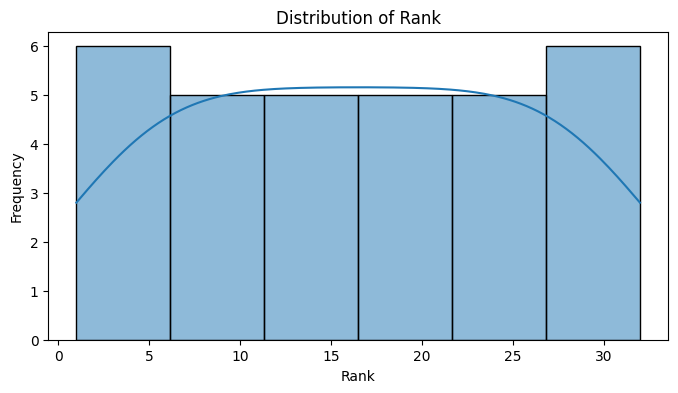

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


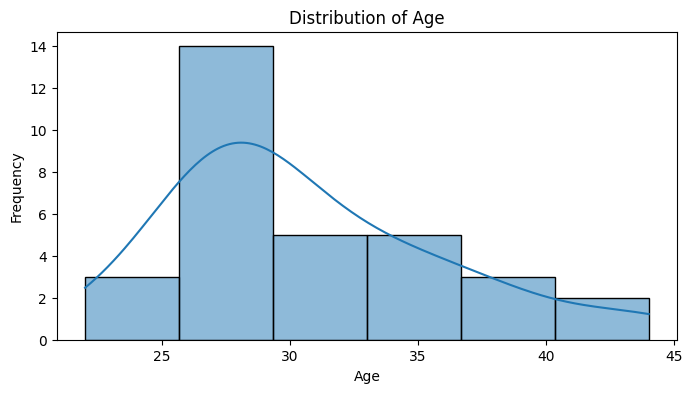

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


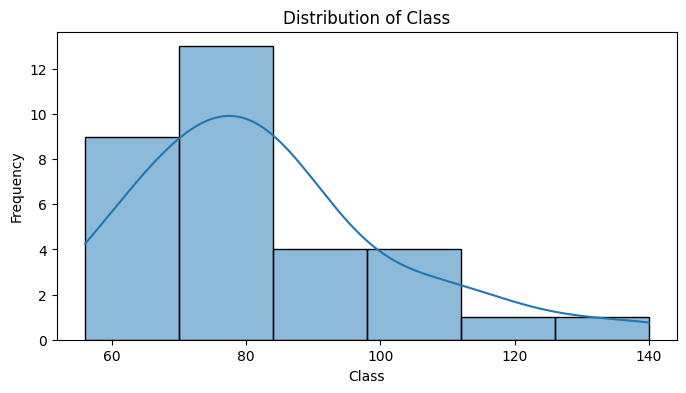

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


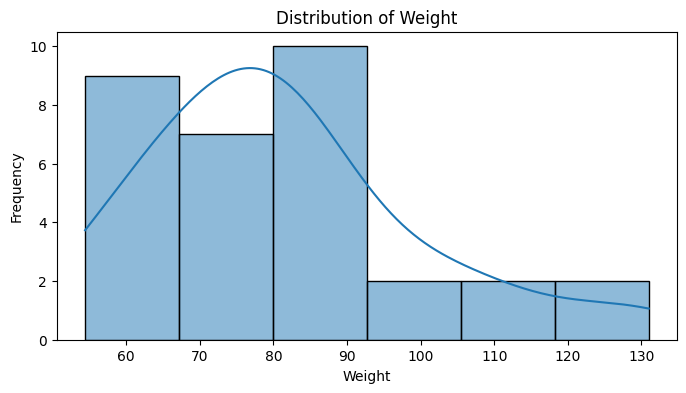

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


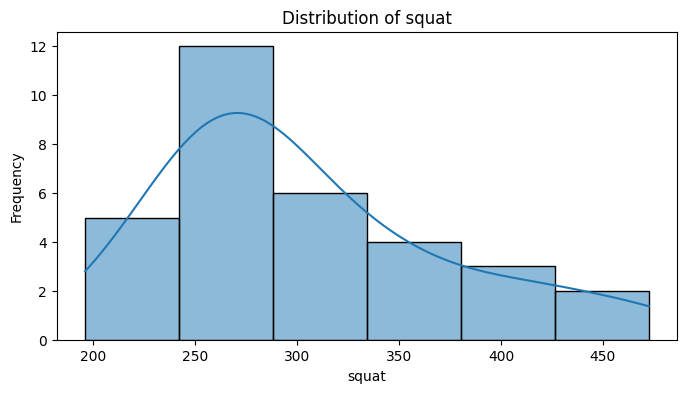

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


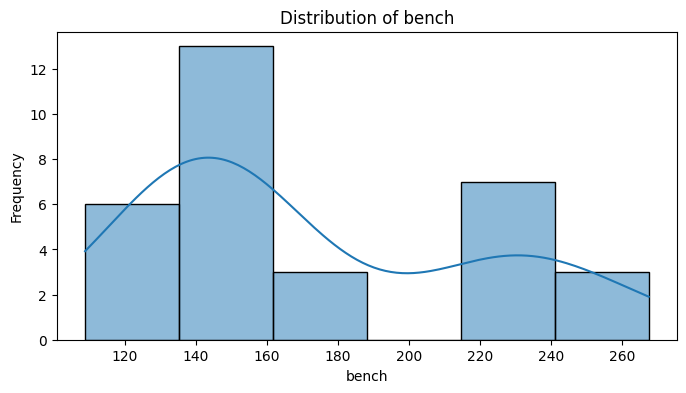

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


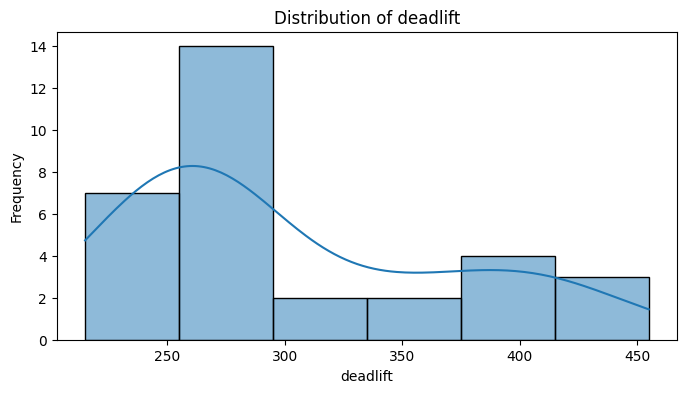

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


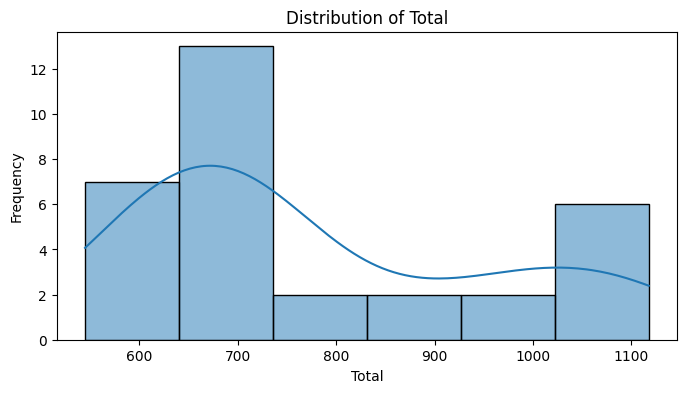

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


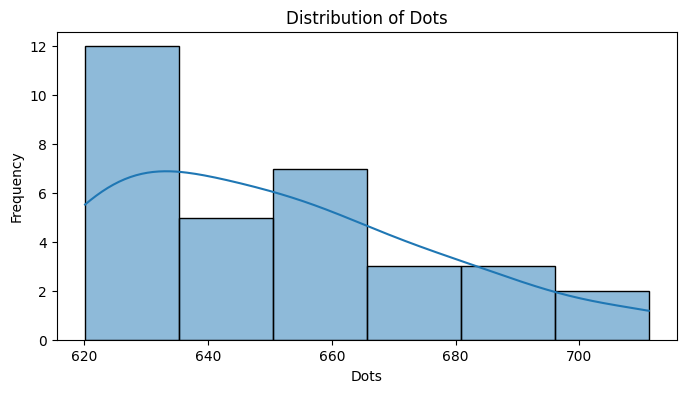

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

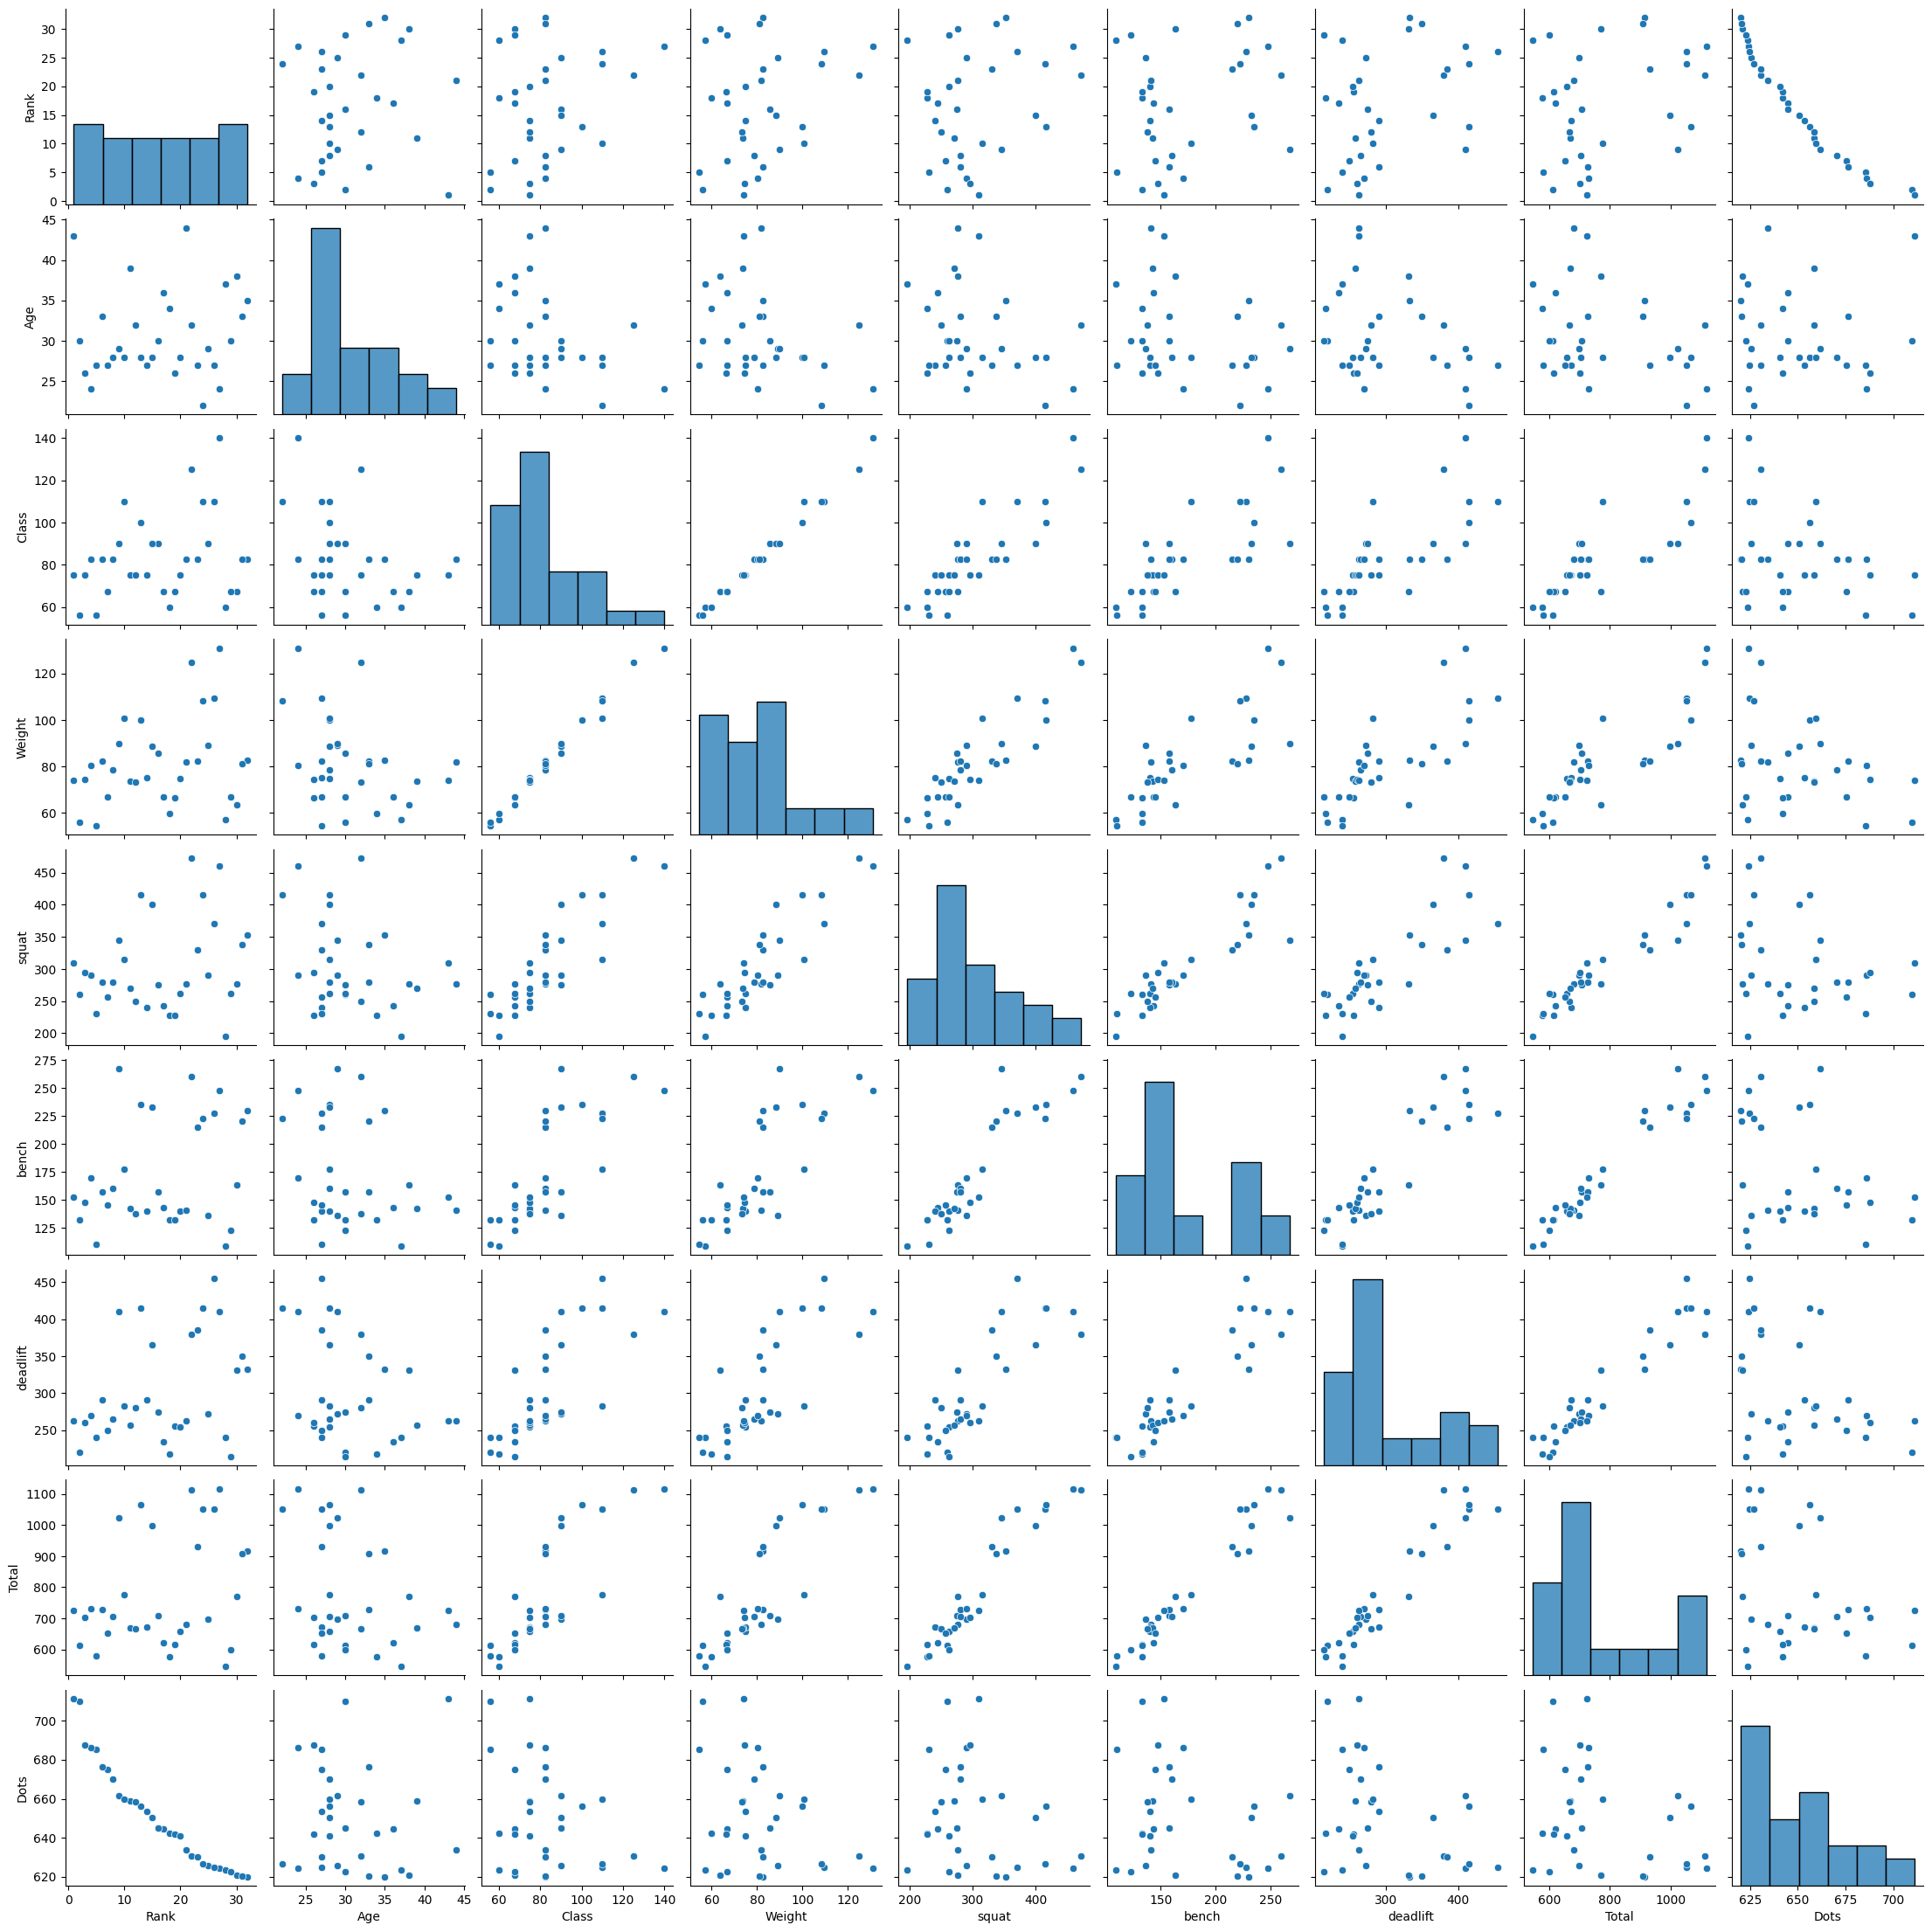

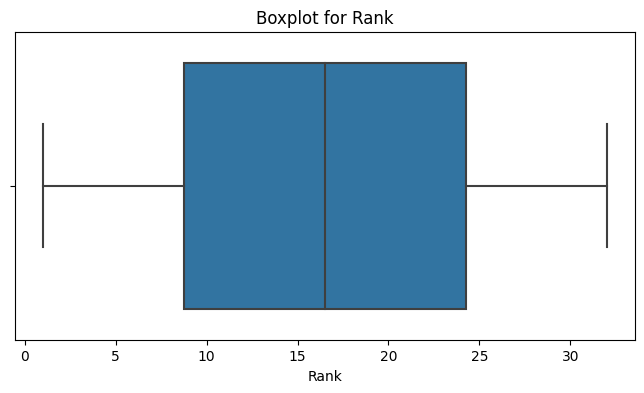

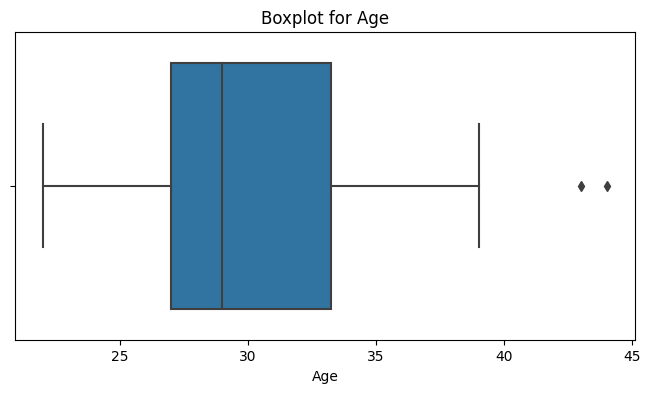

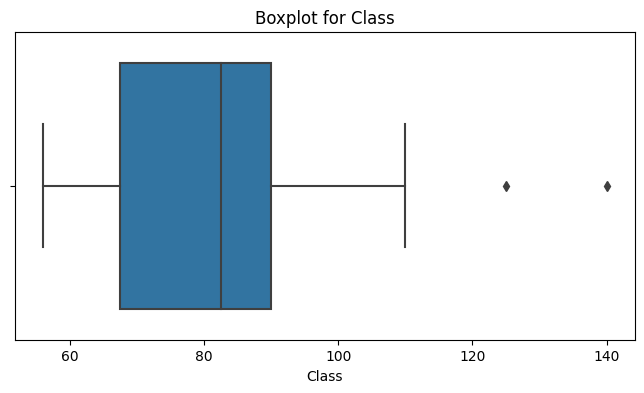

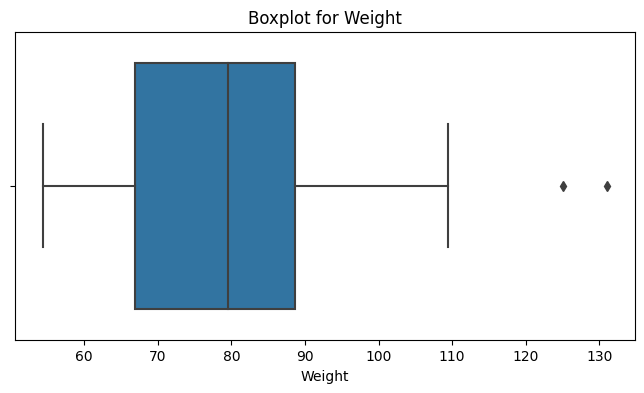

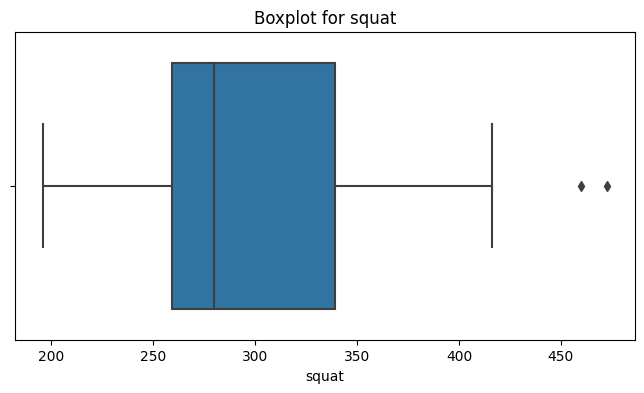

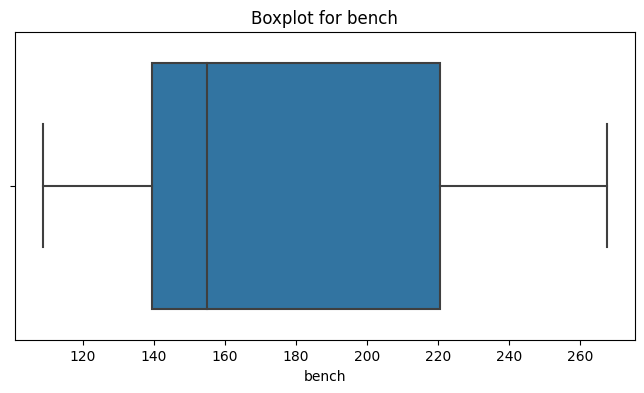

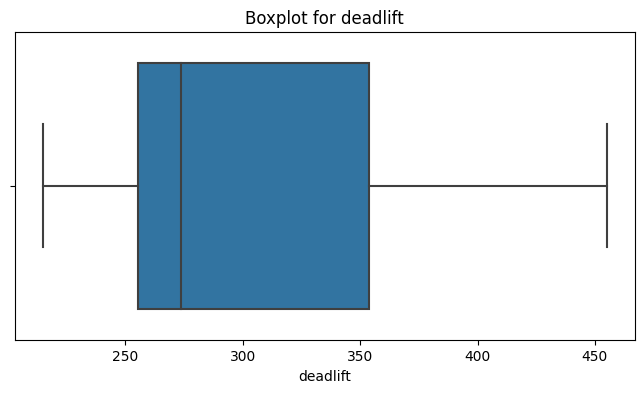

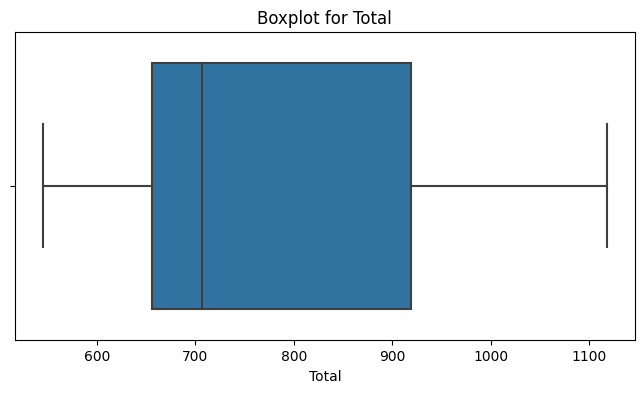

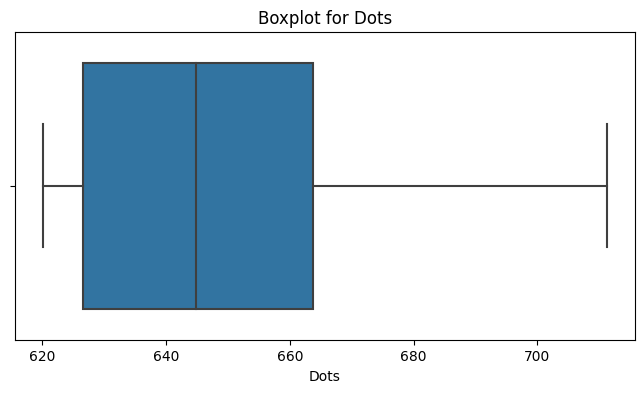

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for all numeric columns
for column in data.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Pairplot to visualize relationships between numeric variables
sns.pairplot(data.select_dtypes(include=['int64', 'float64']))
plt.show()

# Boxplots to identify outliers
for column in data.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


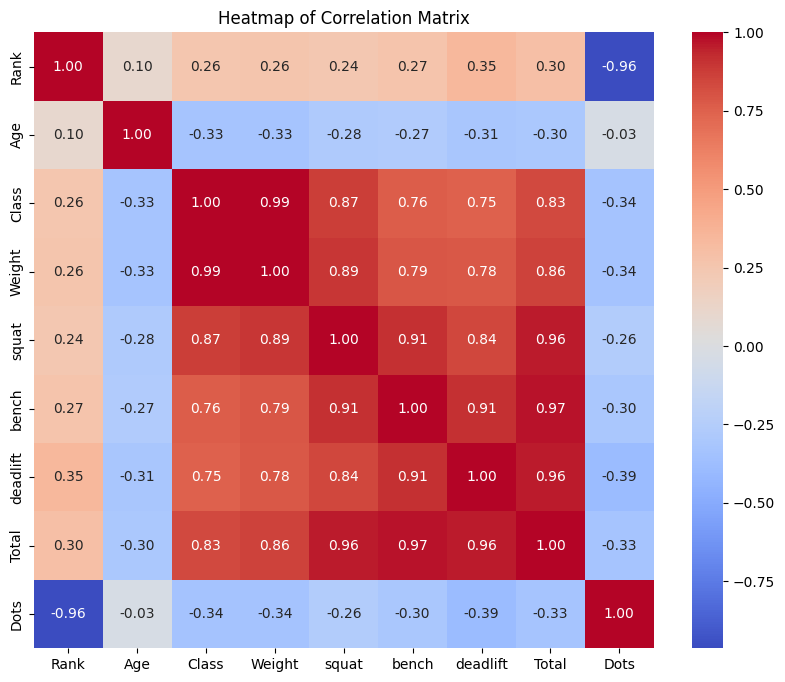

In [10]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])  # This ensures only numeric columns are included
corr = numeric_data.corr()

# Generate a heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [11]:
# Print all column names to see what we have
print("Available columns in DataFrame:")
print(data.columns.tolist())


Available columns in DataFrame:
['Rank', 'Location', 'Gender', 'Age', 'Equip', 'Class', 'Weight', 'squat', 'bench', 'deadlift', 'Total', 'Dots', 'Name']


In [12]:
# Check the data types for the lifting columns
print(data[['squat', 'bench', 'deadlift']].dtypes)

# Convert to numeric if not already, handling non-numeric data
data['squat'] = pd.to_numeric(data['squat'], errors='coerce')
data['bench'] = pd.to_numeric(data['bench'], errors='coerce')
data['deadlift'] = pd.to_numeric(data['deadlift'], errors='coerce')

# Fill NaN values with the mean of each column
data['squat'].fillna(data['squat'].mean(), inplace=True)
data['bench'].fillna(data['bench'].mean(), inplace=True)
data['deadlift'].fillna(data['deadlift'].mean(), inplace=True)


squat       float64
bench       float64
deadlift    float64
dtype: object


/tmp/ipykernel_18/3067418423.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['squat'].fillna(data['squat'].mean(), inplace=True)
/tmp/ipykernel_18/3067418423.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

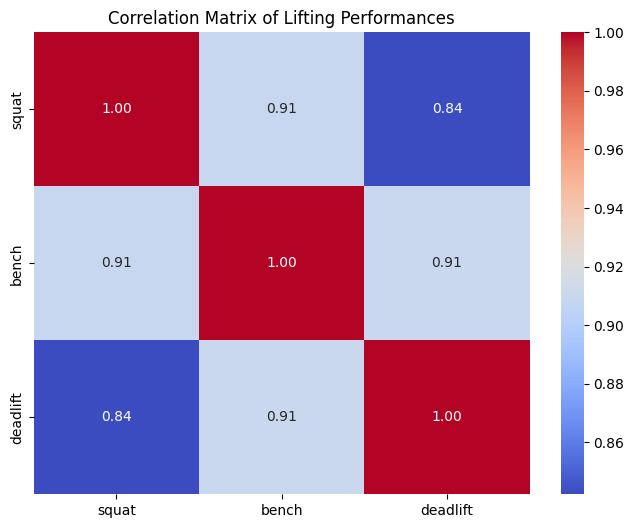

In [13]:
# Calculate the correlation matrix for numeric data related to lifting performances
corr = data[['squat', 'bench', 'deadlift']].corr()

# Generate a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Lifting Performances')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


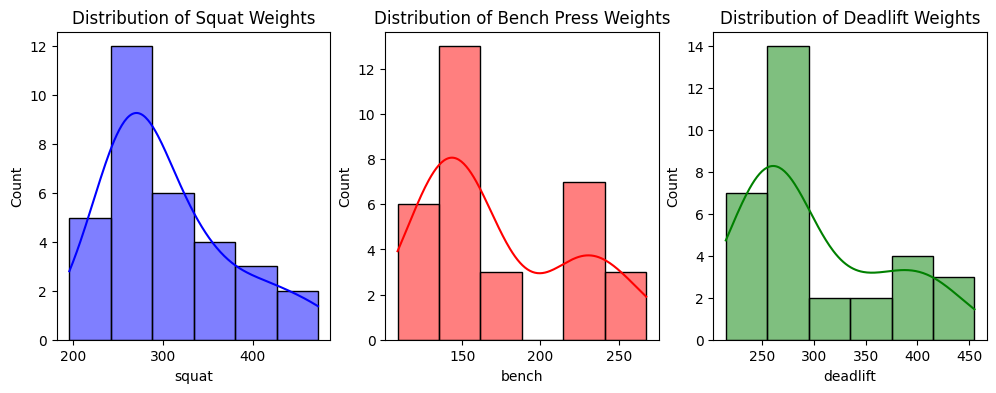

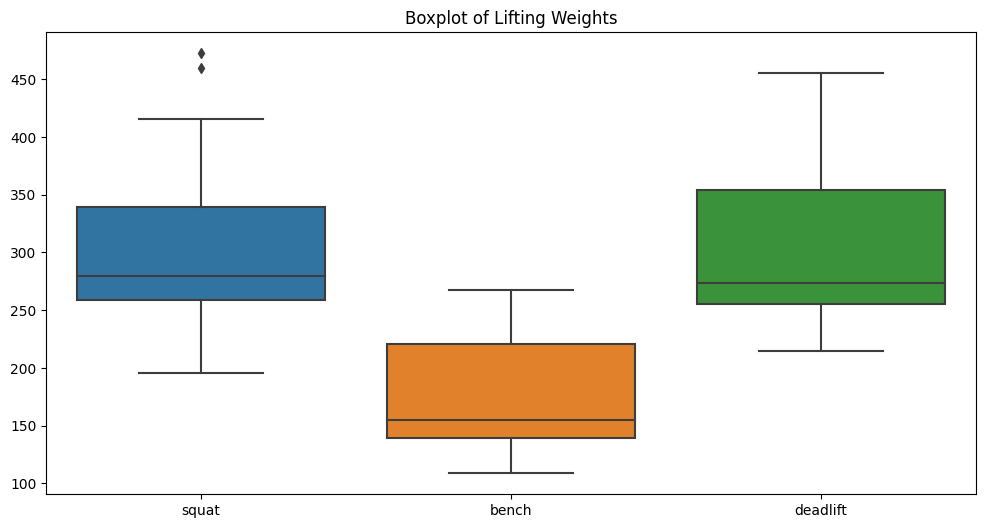

In [14]:
# Histograms of lift performances
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(data['squat'], kde=True, color='blue')
plt.title('Distribution of Squat Weights')

plt.subplot(1, 3, 2)
sns.histplot(data['bench'], kde=True, color='red')
plt.title('Distribution of Bench Press Weights')

plt.subplot(1, 3, 3)
sns.histplot(data['deadlift'], kde=True, color='green')
plt.title('Distribution of Deadlift Weights')
plt.show()

# Boxplots to identify outliers in the lifting data
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['squat', 'bench', 'deadlift']])
plt.title('Boxplot of Lifting Weights')
plt.show()


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure all data is numeric and handle missing values
data['squat'] = pd.to_numeric(data['squat'], errors='coerce').fillna(data['squat'].mean())
data['bench'] = pd.to_numeric(data['bench'], errors='coerce').fillna(data['bench'].mean())
data['deadlift'] = pd.to_numeric(data['deadlift'], errors='coerce').fillna(data['deadlift'].mean())


In [16]:
import plotly.express as px

# Create a DataFrame for the parallel coordinates plot
plot_data = data[['Name', 'squat', 'bench', 'deadlift']]
plot_data = plot_data.dropna()  # Ensure no NaN values

# Create the parallel coordinates plot
fig = px.parallel_coordinates(plot_data, color='squat', labels={
                "squat": "Squat (kg)", 
                "bench": "Bench Press (kg)", 
                "deadlift": "Deadlift (kg)"
            },
            title="Performance Comparison Across Lifts")
fig.show()


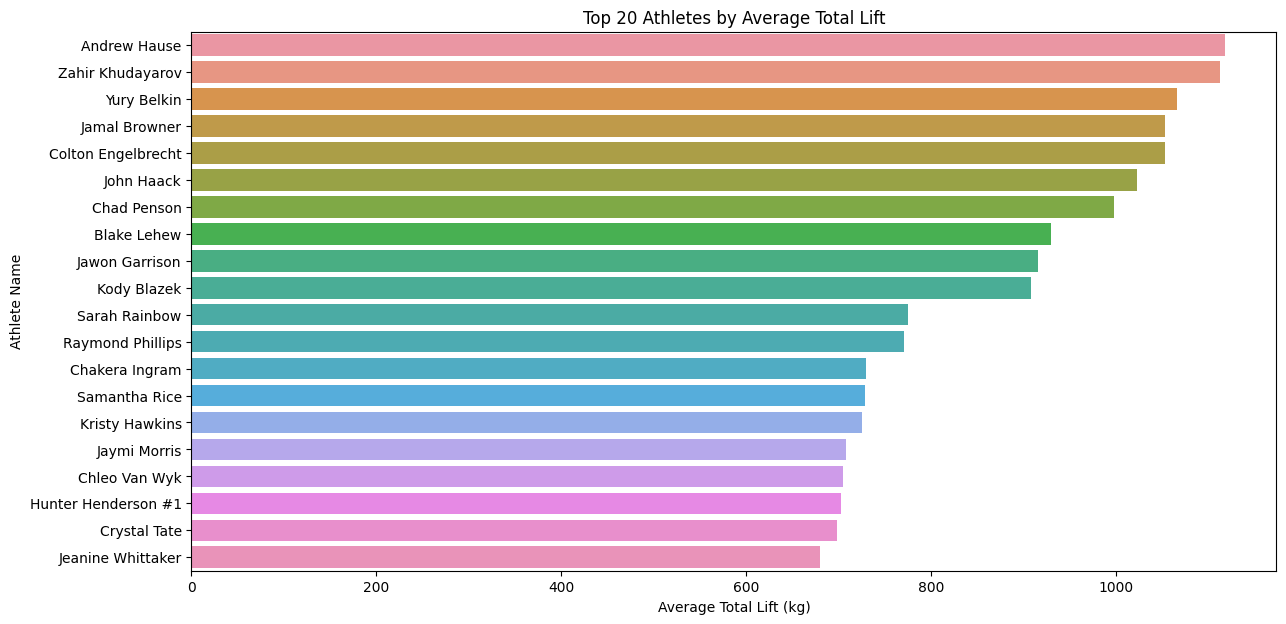

In [17]:
# Calculate total lifts
data['total_lift'] = data['squat'] + data['bench'] + data['deadlift']

# Generate a bar chart of total lifts per athlete
plt.figure(figsize=(14, 7))
top_lifters = data.groupby('Name')['total_lift'].mean().sort_values(ascending=False).head(20)
sns.barplot(x=top_lifters.values, y=top_lifters.index)
plt.title('Top 20 Athletes by Average Total Lift')
plt.xlabel('Average Total Lift (kg)')
plt.ylabel('Athlete Name')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



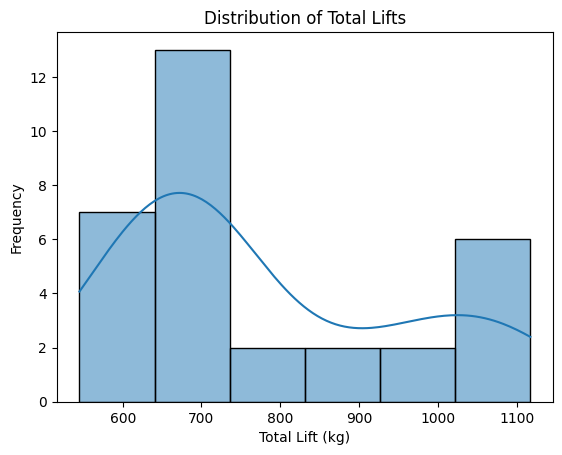

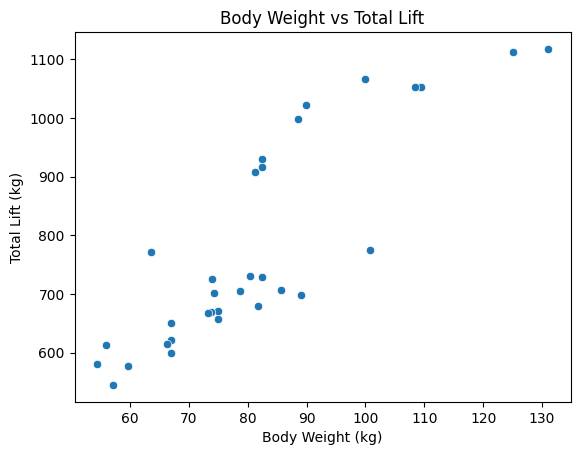

In [18]:
# Histogram of total lifts
sns.histplot(data['total_lift'], kde=True)
plt.title('Distribution of Total Lifts')
plt.xlabel('Total Lift (kg)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of body weight vs total lifts
sns.scatterplot(x=data['Weight'], y=data['total_lift'])
plt.title('Body Weight vs Total Lift')
plt.xlabel('Body Weight (kg)')
plt.ylabel('Total Lift (kg)')
plt.show()


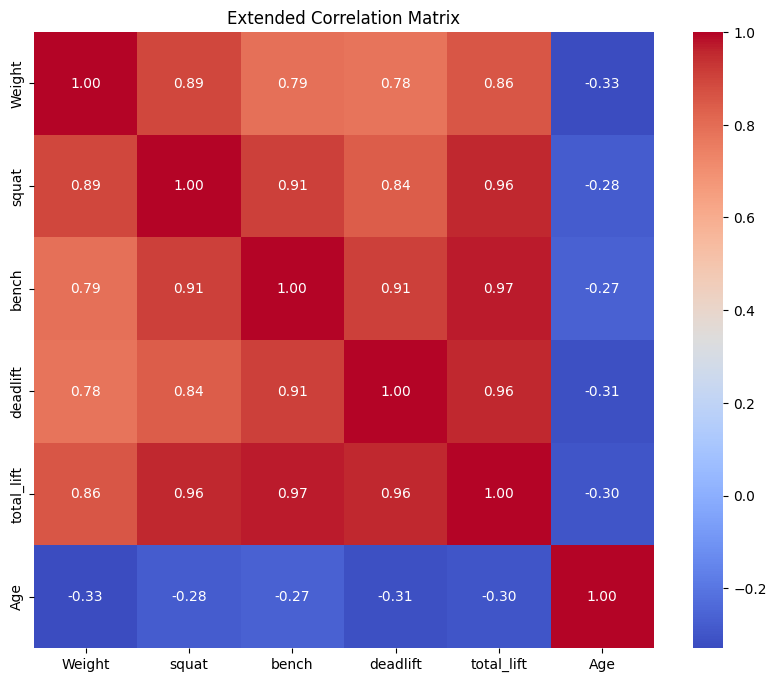

In [19]:
# Extended correlation matrix including weight and age
numeric_columns = ['Weight', 'squat', 'bench', 'deadlift', 'total_lift', 'Age']  # Ensure Age and Weight are clean and numeric
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
corr_matrix = data[numeric_columns].corr()

# Plotting the extended correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Extended Correlation Matrix')
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data for regression
reg_data = data.dropna(subset=['Weight', 'Age', 'total_lift'])
X = reg_data[['Weight', 'Age']]
y = reg_data['total_lift']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse:.2f}')

# Displaying coefficients
print(f'Coefficients: {model.coef_}')


Mean Squared Error: 12431.93
Coefficients: [ 7.46621181 -1.08244599]


In [21]:
pip install dash==2.0.0 dash-bootstrap-components


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 12.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
!pip install dash==2.0.0 dash-bootstrap-components


In [23]:
import plotly.express as px

# Example using Plotly Express to create an interactive bar chart
fig = px.bar(data, x='Name', y=['squat', 'bench', 'deadlift'],
             title="Performance Comparison Across Lifts")
fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [24]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree
X_poly = poly.fit_transform(X_train)

# Fit a linear regression model on the polynomial features
model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)

# Predict and evaluate
X_test_poly = poly.transform(X_test)
predictions_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, predictions_poly)
print(f'Mean Squared Error with Polynomial Features: {mse_poly:.2f}')


Mean Squared Error with Polynomial Features: 12672.89


In [25]:
from sklearn.ensemble import RandomForestRegressor

# Fit a random forest regressor
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# Predict and evaluate
predictions_forest = forest.predict(X_test)
mse_forest = mean_squared_error(y_test, predictions_forest)
print(f'Mean Squared Error with Random Forest: {mse_forest:.2f}')


Mean Squared Error with Random Forest: 15358.68


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Fit a random forest regressor
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# Predict and evaluate
predictions_forest = forest.predict(X_test)
mse_forest = mean_squared_error(y_test, predictions_forest)
print(f'Mean Squared Error with Random Forest: {mse_forest:.2f}')


Mean Squared Error with Random Forest: 15358.68


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



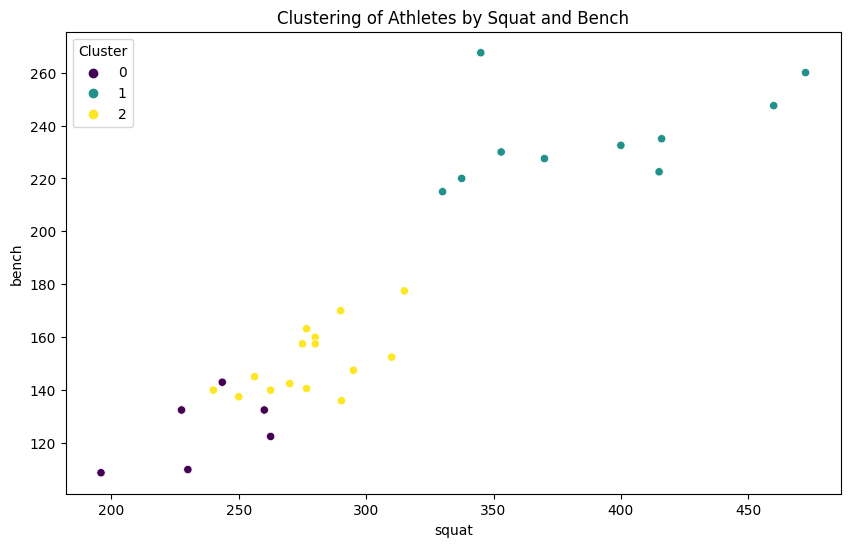

In [27]:
from sklearn.cluster import KMeans

# Use KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data[['squat', 'bench', 'deadlift']])

# Add cluster labels to the dataframe
data['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='squat', y='bench', hue='Cluster', data=data, palette='viridis')
plt.title('Clustering of Athletes by Squat and Bench')
plt.show()


In [28]:
import plotly.express as px

# Interactive scatter plot of weight vs total lift colored by Age
fig = px.scatter(data, x='Weight', y='total_lift', color='Age',
                 hover_data=['Name'], title='Weight vs Total Lift Colored by Age')
fig.show()

# Interactive parallel categories diagram for exploring categorical relationships
fig = px.parallel_categories(data, dimensions=['Cluster', 'Equip', 'Gender'],
                             color='total_lift', color_continuous_scale=px.colors.sequential.Inferno)
fig.show()
